In [1]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=c35f9ee6130b472a2ee75824935da1e967777cb169461cd076c514efe8c063bc
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Using PyOD
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.models.pca import PCA
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


In [14]:
# Start by creating a dataset using generate_data() from pyod
X_train, y_train = generate_data(train_only=True)


In [15]:
# Create dataframe from Pandas using the generated data
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train

# Display first few rows
df_train.head()


,0,1,y
0,0.690399,-1.200906,0.0
1,0.575991,-0.861592,0.0
2,0.289973,-0.387552,0.0
3,0.712535,0.392135,0.0
4,0.063244,1.183241,0.0


Text(0.5, 1.0, 'Ground Truth')

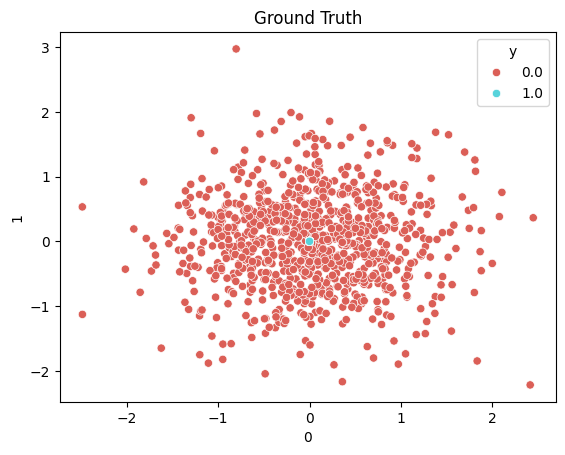

In [16]:
sns.scatterplot(x=0, y=1, hue='y', data=df_train, palette="hls", legend="full")
plt.title('Ground Truth')


In [17]:
# Create PCA model
clf = PCA()


In [18]:
# Trains PCA model
clf.fit(X_train)


PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [19]:
# Store predictions for inlier and outlier in array as 0s and 1s
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_


Text(0.5, 1.0, 'Anomaly Scores by PCA')

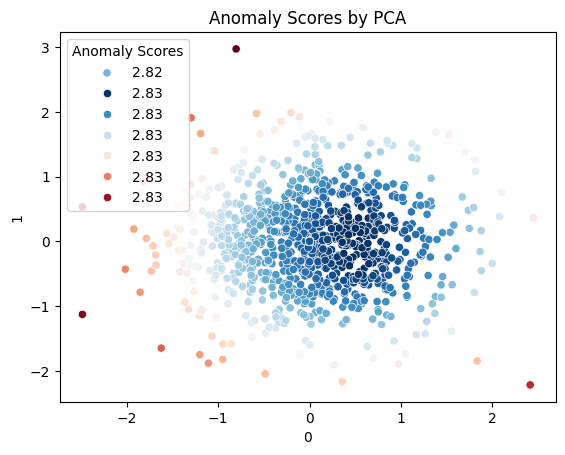

In [20]:
ax = sns.scatterplot(x=0, y=1, hue=y_train_scores, data=df_train, palette="RdBu_r")

# Using legends, results look bit varied
legend_labels = [f"{score:.2f}" for score in np.unique(y_train_scores)]  # Format scores up to 2 decimal places
ax.legend(title="Anomaly Scores", labels=legend_labels)  # Create legend with title and labels
plt.title('Anomaly Scores by PCA')


In [3]:
import pandas as pd

# Load your dataset
data = pd.read_csv('ex-client.csv')

# Ensure that the 'product_id' and 'quantity' columns exist in your dataset
# You can check the actual column names in your DataFrame
#print(data.columns)

# Aggregate the total quantity sold per product
product_sales = data.groupby('product_id')['quantity'].sum().reset_index()

# Sort the products by the total quantity sold
sorted_sales = product_sales.sort_values(by='quantity', ascending=False)

# Display the most sold and least sold products
most_sold = sorted_sales.iloc[0]
least_sold = sorted_sales.iloc[-1]

print(f"Most sold item: Product ID {most_sold['product_id']} with quantity {most_sold['quantity']}")
print(f"Least sold item: Product ID {least_sold['product_id']} with quantity {least_sold['quantity']}")


Most sold item: Product ID 3 with quantity 12
Least sold item: Product ID 2 with quantity 6


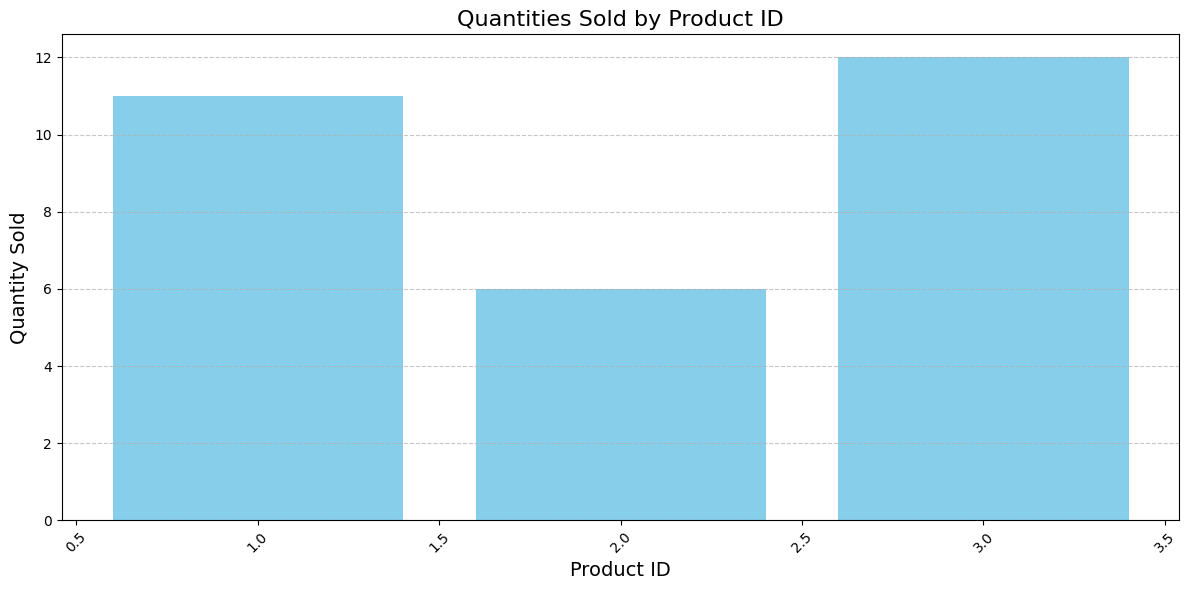

In [4]:
import matplotlib.pyplot as plt

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_sales['product_id'], sorted_sales['quantity'], color='skyblue')

# Add labels and title
plt.title('Quantities Sold by Product ID', fontsize=16)
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)

# Rotate x-axis labels if there are many product IDs
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [5]:
import pandas as pd

# Load your dataset
data2 = pd.read_csv('ex-client2.csv')

# Ensure that the 'product_id' and 'quantity' columns exist in your dataset
# You can check the actual column names in your DataFrame
#print(data.columns)

# Aggregate the total quantity sold per product
product_sales = data2.groupby('product_id')['quantity'].sum().reset_index()

# Sort the products by the total quantity sold
sorted_sales = product_sales.sort_values(by='quantity', ascending=False)

# Display the most sold and least sold products
most_sold = sorted_sales.iloc[0]
least_sold = sorted_sales.iloc[-1]

print(f"Most sold item: Product ID {most_sold['product_id']} with quantity {most_sold['quantity']}")
print(f"Least sold item: Product ID {least_sold['product_id']} with quantity {least_sold['quantity']}")


Most sold item: Product ID 3 with quantity 23
Least sold item: Product ID 8 with quantity 6


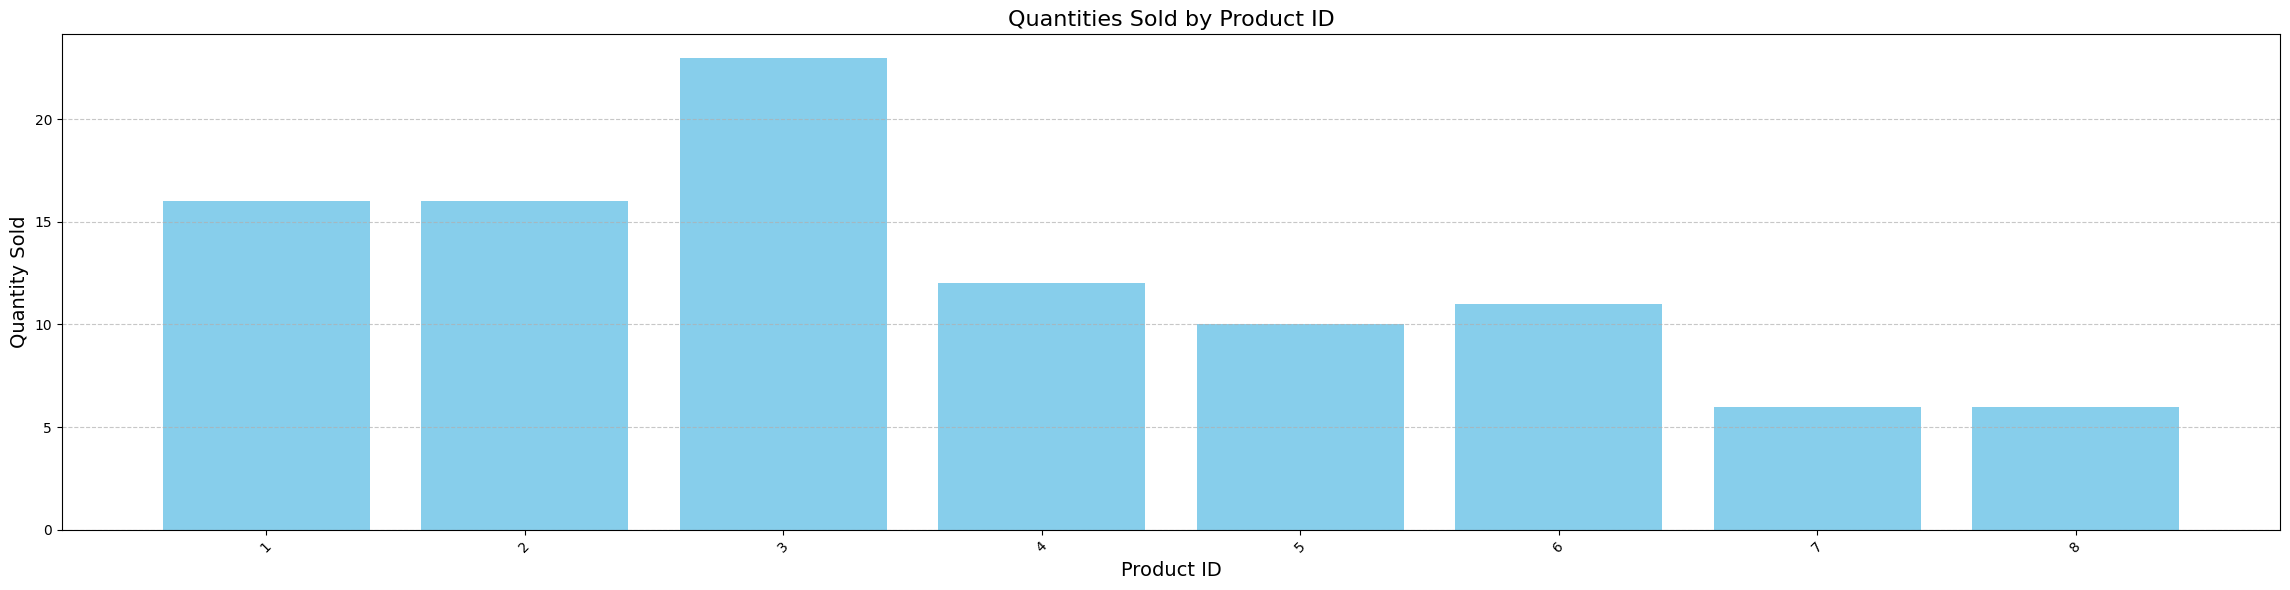

In [6]:
import matplotlib.pyplot as plt

# Plot the bar graph
plt.figure(figsize=(23, 6))
plt.bar(sorted_sales['product_id'], sorted_sales['quantity'], color='skyblue')

# Add labels and title
plt.title('Quantities Sold by Product ID', fontsize=16)
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)

# Rotate x-axis labels if there are many product IDs
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
